In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from pandas import get_dummies


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [0]:
import io
dfTrain = pd.read_excel(io.BytesIO(uploaded['Data_Train.xlsx']))
dfTrain.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [0]:
dfTrain.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [0]:
dfTrain.info()   #Clearly nan values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [0]:
dfTrain.dropna(inplace = True)
dfTrain.reset_index(drop = True, inplace = True)
dfTrain.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [0]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [0]:
dfTrain['Name'].unique().size  # We ignore this column for the time being
dfTrain

1855

In [0]:
X = dfTrain.iloc[:,:]


In [0]:
X.shape, y.shape
y.dtype

dtype('float64')

In [0]:
X['Name'] = X['Name'].apply(lambda x: list(x.split(' '))[0])
X['Mileage'] = X['Mileage'].apply(lambda x: float(list(x.split(' '))[0]))
X['Engine'] = X['Engine'].apply(lambda x: float(list(x.split(' '))[0]))
# X['Power'] = X['Power'].apply(lambda x: float(list(x.split(' '))[0]))
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 560.3+ KB


In [0]:
(X['Power'] == 'null').any()

False

In [0]:
lisNull = [index for index, element in enumerate(X['Power']) if element == 'null']

X['Power'] = X['Power'].apply(lambda x: list(x.split(' '))[0])
X.drop(lisNull, inplace = True)
X['Power'] = X['Power'].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [0]:
X.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [0]:
print(X['Name'].unique())
print(X['Location'].unique())
print(X['Year'].unique())
print(X['Fuel_Type'].unique())
print(X['Transmission'].unique())
print(X['Owner_Type'].unique())
print(X['Seats'].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
[ 5.  7.  8.  4.  6.  2. 10.  9.  0.]


In [0]:
#No significant trouble with categorical variables

In [0]:
#Discovery and elimination of outliers

In [0]:
import seaborn as sns

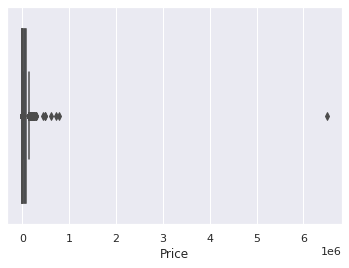

In [0]:
sns.boxplot(X['Kilometers_Driven'])



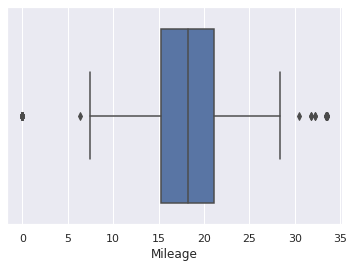

In [0]:
sns.boxplot(X['Mileage'])


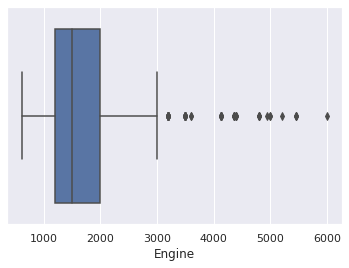

In [0]:
sns.boxplot(X['Engine'])


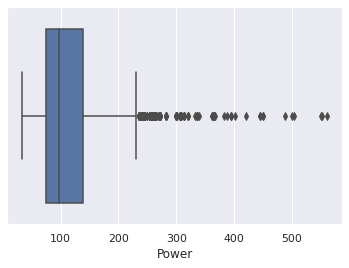

In [0]:

sns.boxplot(X['Power'])


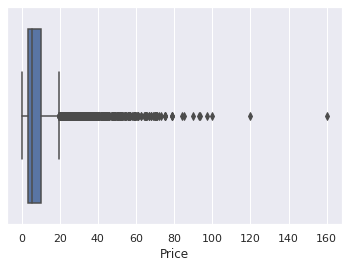

In [0]:

sns.boxplot(y)

In [0]:
#There are significant outliers in the data which need to be eliminated

In [0]:
#We remove the outliers using two methods, Z score calculation and IQR calculations, we store the result in two data frames

In [0]:
# using IQR
X.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
Q1 = X['Kilometers_Driven'].quantile(0.25)
Q3 = X['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
M = X[~((X['Kilometers_Driven']< Q1-1.5*IQR)|(X['Kilometers_Driven']> Q3+1.5*IQR))]
M.head()
M.info()

38980.25
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5673 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5673 non-null   object 
 1   Location           5673 non-null   object 
 2   Year               5673 non-null   int64  
 3   Kilometers_Driven  5673 non-null   int64  
 4   Fuel_Type          5673 non-null   object 
 5   Transmission       5673 non-null   object 
 6   Owner_Type         5673 non-null   object 
 7   Mileage            5673 non-null   float64
 8   Engine             5673 non-null   float64
 9   Power              5673 non-null   float64
 10  Seats              5673 non-null   float64
 11  Price              5673 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 576.2+ KB


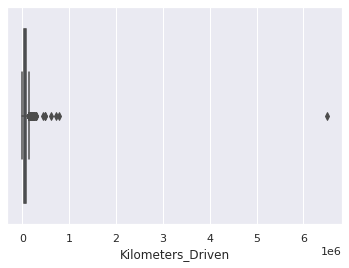

In [0]:
sns.boxplot(X['Kilometers_Driven'])

In [0]:
Q1 = M['Mileage'].quantile(0.25)
Q3 = M['Mileage'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
M = M[~((M['Mileage']< Q1-1.5*IQR)|(M['Mileage']> Q3+1.5*IQR))]
print(M.head())
M.info()

5.700000000000001
      Name    Location  Year  Kilometers_Driven  ...  Engine   Power Seats  Price
0   Maruti      Mumbai  2010              72000  ...   998.0   58.16   5.0   1.75
1  Hyundai        Pune  2015              41000  ...  1582.0  126.20   5.0  12.50
2    Honda     Chennai  2011              46000  ...  1199.0   88.70   5.0   4.50
3   Maruti     Chennai  2012              87000  ...  1248.0   88.76   7.0   6.00
4     Audi  Coimbatore  2013              40670  ...  1968.0  140.80   5.0  17.74

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5631 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5631 non-null   object 
 1   Location           5631 non-null   object 
 2   Year               5631 non-null   int64  
 3   Kilometers_Driven  5631 non-null   int64  
 4   Fuel_Type          5631 non-null   object 
 5   Transmission       

In [0]:
Q1 = M['Engine'].quantile(0.25)
Q3 = M['Engine'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
M = M[~((M['Engine']< Q1-1.5*IQR)|(M['Engine']> Q3+1.5*IQR))]
print(M.head())
M.info()

770.0
      Name    Location  Year  Kilometers_Driven  ...  Engine   Power Seats  Price
0   Maruti      Mumbai  2010              72000  ...   998.0   58.16   5.0   1.75
1  Hyundai        Pune  2015              41000  ...  1582.0  126.20   5.0  12.50
2    Honda     Chennai  2011              46000  ...  1199.0   88.70   5.0   4.50
3   Maruti     Chennai  2012              87000  ...  1248.0   88.76   7.0   6.00
4     Audi  Coimbatore  2013              40670  ...  1968.0  140.80   5.0  17.74

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5577 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5577 non-null   object 
 1   Location           5577 non-null   object 
 2   Year               5577 non-null   int64  
 3   Kilometers_Driven  5577 non-null   int64  
 4   Fuel_Type          5577 non-null   object 
 5   Transmission       5577 non-nul

In [0]:
Q1 = M['Power'].quantile(0.25)
Q3 = M['Power'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
M = M[~((M['Power']< Q1-1.5*IQR)|(M['Power']> Q3+1.5*IQR))]
print(M.head())
M.info()

63.03
      Name    Location  Year  Kilometers_Driven  ...  Engine   Power Seats  Price
0   Maruti      Mumbai  2010              72000  ...   998.0   58.16   5.0   1.75
1  Hyundai        Pune  2015              41000  ...  1582.0  126.20   5.0  12.50
2    Honda     Chennai  2011              46000  ...  1199.0   88.70   5.0   4.50
3   Maruti     Chennai  2012              87000  ...  1248.0   88.76   7.0   6.00
4     Audi  Coimbatore  2013              40670  ...  1968.0  140.80   5.0  17.74

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5385 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5385 non-null   object 
 1   Location           5385 non-null   object 
 2   Year               5385 non-null   int64  
 3   Kilometers_Driven  5385 non-null   int64  
 4   Fuel_Type          5385 non-null   object 
 5   Transmission       5385 non-nul

In [0]:
Q1 = M['Price'].quantile(0.25)
Q3 = M['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
M = M[~((M['Price']< Q1-1.5*IQR)|(M['Price']> Q3+1.5*IQR))]
print(M.head())
M.info()

5.5
      Name   Location  Year  Kilometers_Driven  ...  Engine   Power Seats  Price
0   Maruti     Mumbai  2010              72000  ...   998.0   58.16   5.0   1.75
1  Hyundai       Pune  2015              41000  ...  1582.0  126.20   5.0  12.50
2    Honda    Chennai  2011              46000  ...  1199.0   88.70   5.0   4.50
3   Maruti    Chennai  2012              87000  ...  1248.0   88.76   7.0   6.00
5  Hyundai  Hyderabad  2012              75000  ...   814.0   55.20   5.0   2.35

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4780 non-null   object 
 1   Location           4780 non-null   object 
 2   Year               4780 non-null   int64  
 3   Kilometers_Driven  4780 non-null   int64  
 4   Fuel_Type          4780 non-null   object 
 5   Transmission       4780 non-null   obje

In [487]:
M.shape
M['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Nissan', 'Volkswagen', 'Tata',
       'Mitsubishi', 'Renault', 'Toyota', 'Mahindra', 'Audi', 'Ford',
       'Mercedes-Benz', 'BMW', 'Datsun', 'Chevrolet', 'Skoda', 'Fiat',
       'Volvo', 'Land', 'Mini', 'Ambassador', 'Jeep', 'ISUZU', 'Force'],
      dtype=object)

In [0]:
from scipy import stats

In [0]:
zScore = np.abs(stats.zscore(X['Kilometers_Driven']))
R = X[zScore < 3]
R.info()
R.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5865 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5865 non-null   object 
 1   Location           5865 non-null   object 
 2   Year               5865 non-null   int64  
 3   Kilometers_Driven  5865 non-null   int64  
 4   Fuel_Type          5865 non-null   object 
 5   Transmission       5865 non-null   object 
 6   Owner_Type         5865 non-null   object 
 7   Mileage            5865 non-null   float64
 8   Engine             5865 non-null   float64
 9   Power              5865 non-null   float64
 10  Seats              5865 non-null   float64
 11  Price              5865 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 595.7+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
zScore = np.abs(stats.zscore(R['Mileage']))
R = R[zScore < 3]
zScore = np.abs(stats.zscore(R['Engine']))
R = R[zScore < 3]
zScore = np.abs(stats.zscore(R['Power']))
R = R[zScore < 3]
zScore = np.abs(stats.zscore(R['Price']))
R = R[zScore < 3]
R.info()
R.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5592 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5592 non-null   object 
 1   Location           5592 non-null   object 
 2   Year               5592 non-null   int64  
 3   Kilometers_Driven  5592 non-null   int64  
 4   Fuel_Type          5592 non-null   object 
 5   Transmission       5592 non-null   object 
 6   Owner_Type         5592 non-null   object 
 7   Mileage            5592 non-null   float64
 8   Engine             5592 non-null   float64
 9   Power              5592 non-null   float64
 10  Seats              5592 non-null   float64
 11  Price              5592 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 567.9+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
dfTrain.shape

(5872, 12)

In [0]:
# Encoding categorical variables, (Owner type : Original encoding, Transmission), (Name location fuelType, One hot encoding)

In [0]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, LabelBinarizer

In [0]:
mEnc = pd.get_dummies(M, columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
mEnc.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Ambassador,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
5,2012,75000,21.10,814.0,55.20,5.0,2.35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0


In [0]:
mEncY = mEnc.iloc[:, 6]
# mEnc.drop(['Price'], axis = 1, inplace= True)
mEnc.head()
mEnc = mEnc.apply(lambda x: (x-np.mean(x))/(np.std(x)))
mEnc.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Ambassador,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.070242,0.650811,1.920231,-1.050254,-1.170183,-0.339623,-0.014465,-0.098575,-0.131292,-0.158402,-0.052221,-0.06482,-0.02506,-0.23788,-0.375249,-0.523114,-0.020459,-0.02506,-0.02894,-0.236897,1.789985,-0.143921,-0.014465,-0.06482,-0.135356,-0.17434,-0.184284,-0.189677,-0.230927,-0.262437,-0.040944,-0.203456,-0.227896,-0.293877,-0.325136,-0.324349,-0.363176,-0.284103,-0.349379,-0.336039,2.527438,-0.340264,10.751063,-0.931229,-0.045787,-1.051094,-0.46872,0.46872,0.460399,-0.032359,-0.430033,-0.134552
1,0.518107,-0.497971,0.171472,0.273866,0.869581,-0.339623,-0.014465,-0.098575,-0.131292,-0.158402,-0.052221,-0.06482,-0.02506,-0.23788,-0.375249,1.911631,-0.020459,-0.02506,-0.02894,-0.236897,-0.558664,-0.143921,-0.014465,-0.06482,-0.135356,-0.17434,-0.184284,-0.189677,-0.230927,-0.262437,-0.040944,-0.203456,-0.227896,-0.293877,-0.325136,-0.324349,-0.363176,-0.284103,-0.349379,-0.336039,-0.395658,2.938894,-0.093014,1.073850,-0.045787,-1.051094,-0.46872,0.46872,0.460399,-0.032359,-0.430033,-0.134552
2,-0.752572,-0.312684,-0.199477,-0.594521,-0.254628,-0.339623,-0.014465,-0.098575,-0.131292,-0.158402,-0.052221,-0.06482,-0.02506,-0.23788,2.664901,-0.523114,-0.020459,-0.02506,-0.02894,-0.236897,-0.558664,-0.143921,-0.014465,-0.06482,-0.135356,-0.17434,-0.184284,-0.189677,-0.230927,-0.262437,-0.040944,-0.203456,-0.227896,3.402785,-0.325136,-0.324349,-0.363176,-0.284103,-0.349379,-0.336039,-0.395658,-0.340264,-0.093014,-0.931229,-0.045787,0.951389,-0.46872,0.46872,0.460399,-0.032359,-0.430033,-0.134552
3,-0.434902,1.206673,0.449053,-0.483422,-0.252829,2.379637,-0.014465,-0.098575,-0.131292,-0.158402,-0.052221,-0.06482,-0.02506,-0.23788,-0.375249,-0.523114,-0.020459,-0.02506,-0.02894,-0.236897,1.789985,-0.143921,-0.014465,-0.06482,-0.135356,-0.17434,-0.184284,-0.189677,-0.230927,-0.262437,-0.040944,-0.203456,-0.227896,3.402785,-0.325136,-0.324349,-0.363176,-0.284103,-0.349379,-0.336039,-0.395658,-0.340264,-0.093014,1.073850,-0.045787,-1.051094,-0.46872,0.46872,0.460399,-0.032359,-0.430033,-0.134552
5,-0.434902,0.761983,0.532327,-1.467442,-1.258920,-0.339623,-0.014465,-0.098575,-0.131292,-0.158402,-0.052221,-0.06482,-0.02506,-0.23788,-0.375249,1.911631,-0.020459,-0.02506,-0.02894,-0.236897,-0.558664,-0.143921,-0.014465,-0.06482,-0.135356,-0.17434,-0.184284,-0.189677,-0.230927,-0.262437,-0.040944,-0.203456,-0.227896,-0.293877,-0.325136,-0.324349,2.753486,-0.284103,-0.349379,-0.336039,-0.395658,-0.340264,-0.093014,-0.931229,21.840330,-1.051094,-0.46872,0.46872,0.460399,-0.032359,-0.430033,-0.134552


In [0]:
rEnc = pd.get_dummies(R, columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
rEnc.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Ambassador,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [0]:
rEncY = rEnc.iloc[:, 6]
rEnc.drop(['Price'], axis = 1, inplace= True)
rEnc.head()
rEnc = rEnc.apply(lambda x: (x-np.mean(x))/(np.std(x)))
rEnc.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Ambassador,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.081914,0.433209,1.985305,-1.097144,-1.149964,-0.370306,-0.013374,-0.189070,-0.197532,-0.148087,-0.048272,-0.064265,-0.023168,-0.235146,-0.346364,-0.480525,-0.018915,-0.013374,-0.055221,-0.051862,-0.068346,-0.224362,1.952535,-0.208047,-0.067013,-0.069655,-0.127173,-0.163157,-0.176532,-0.183936,-0.275315,-0.243086,-0.061396,-0.200928,-0.245142,-0.299743,-0.33459,-0.319854,-0.373937,-0.276816,-0.350237,-0.315418,2.566616,-0.339197,11.495341,-1.054033,-0.042326,-0.931188,-0.590567,0.590567,0.464099,-0.035403,-0.433901,-0.133558
1,0.499554,-0.486637,0.282814,0.026374,0.452072,-0.370306,-0.013374,-0.189070,-0.197532,-0.148087,-0.048272,-0.064265,-0.023168,-0.235146,-0.346364,2.081055,-0.018915,-0.013374,-0.055221,-0.051862,-0.068346,-0.224362,-0.512155,-0.208047,-0.067013,-0.069655,-0.127173,-0.163157,-0.176532,-0.183936,-0.275315,-0.243086,-0.061396,-0.200928,-0.245142,-0.299743,-0.33459,-0.319854,-0.373937,-0.276816,-0.350237,-0.315418,-0.389618,2.948136,-0.086992,0.948737,-0.042326,-0.931188,-0.590567,0.590567,0.464099,-0.035403,-0.433901,-0.133558
2,-0.765620,-0.338275,-0.078320,-0.710453,-0.430884,-0.370306,-0.013374,-0.189070,-0.197532,-0.148087,-0.048272,-0.064265,-0.023168,-0.235146,2.887137,-0.480525,-0.018915,-0.013374,-0.055221,-0.051862,-0.068346,-0.224362,-0.512155,-0.208047,-0.067013,-0.069655,-0.127173,-0.163157,-0.176532,-0.183936,-0.275315,-0.243086,-0.061396,-0.200928,-0.245142,3.336188,-0.33459,-0.319854,-0.373937,-0.276816,-0.350237,-0.315418,-0.389618,-0.339197,-0.086992,-1.054033,-0.042326,1.073897,-0.590567,0.590567,0.464099,-0.035403,-0.433901,-0.133558
3,-0.449327,0.878295,0.553051,-0.616186,-0.429471,2.170490,-0.013374,-0.189070,-0.197532,-0.148087,-0.048272,-0.064265,-0.023168,-0.235146,-0.346364,-0.480525,-0.018915,-0.013374,-0.055221,-0.051862,-0.068346,-0.224362,1.952535,-0.208047,-0.067013,-0.069655,-0.127173,-0.163157,-0.176532,-0.183936,-0.275315,-0.243086,-0.061396,-0.200928,-0.245142,3.336188,-0.33459,-0.319854,-0.373937,-0.276816,-0.350237,-0.315418,-0.389618,-0.339197,-0.086992,0.948737,-0.042326,-0.931188,-0.590567,0.590567,0.464099,-0.035403,-0.433901,-0.133558
4,-0.133033,-0.496429,-0.815330,0.768973,0.795837,-0.370306,-0.013374,5.289054,-0.197532,-0.148087,-0.048272,-0.064265,-0.023168,-0.235146,-0.346364,-0.480525,-0.018915,-0.013374,-0.055221,-0.051862,-0.068346,-0.224362,-0.512155,-0.208047,-0.067013,-0.069655,-0.127173,-0.163157,-0.176532,-0.183936,-0.275315,-0.243086,-0.061396,-0.200928,-0.245142,-0.299743,2.98873,-0.319854,-0.373937,-0.276816,-0.350237,-0.315418,-0.389618,-0.339197,-0.086992,0.948737,-0.042326,-0.931188,1.693287,-1.693287,-2.154712,-0.035403,2.304672,-0.133558


In [0]:
mEnc.to_csv('trainSetNormalisedIQR.csv')

In [0]:
rEnc.to_csv('trainSetNormalisedZScore.csv')

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
!cp trainSetNormalisedIQR.csv "drive/My Drive/"


In [0]:
!cp trainSetNormalisedZScore.csv "drive/My Drive/"


In [0]:
rEnc.shape, rEncY.shape, mEnc.shape, mEncY.shape

((5592, 54), (5592,), (4780, 52), (4780,))

In [0]:
rEnc.columns, mEnc.columns

(Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
        'Name_Ambassador', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet',
        'Name_Datsun', 'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda',
        'Name_Hyundai', 'Name_ISUZU', 'Name_Isuzu', 'Name_Jaguar', 'Name_Jeep',
        'Name_Land', 'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz',
        'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan', 'Name_Renault',
        'Name_Skoda', 'Name_Tata', 'Name_Toyota', 'Name_Volkswagen',
        'Name_Volvo', 'Location_Ahmedabad', 'Location_Bangalore',
        'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
        'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
        'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
        'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
        'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
        'Owner_Type_Fourth & Above', 'Owner_Type_Second',

In [0]:
set(rEnc.columns)-set(mEnc.columns)

{'Name_Isuzu', 'Name_Jaguar'}

In [0]:
set(mEnc.columns)-set(rEnc.columns)

set()

In [0]:
from google.colab import files
uploaded = files.upload()
import io
dfTest = pd.read_excel(io.BytesIO(uploaded['Data_Test.xlsx']))
dfTest.head()

Saving Data_Test.xlsx to Data_Test (1).xlsx


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [0]:
dfTest.shape

(1234, 11)

In [0]:
#Building and training the neural network model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import keras


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
XTrain, XTest, yTrain, yTest = train_test_split(rEnc, rEncY, test_size = 0.3)

In [340]:
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

((3914, 54), (1678, 54), (3914,), (1678,))

In [442]:
model = Sequential()
model.add(Dense(54, input_dim = 54, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(54, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(13, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['mean_squared_error', 'mean_absolute_error'])
model.summary()
history = model.fit(XTrain, yTrain, epochs= 40, batch_size= 256,  verbose=1, validation_split=0.3)

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 54)                2970      
_________________________________________________________________
dense_289 (Dense)            (None, 54)                2970      
_________________________________________________________________
dense_290 (Dense)            (None, 13)                715       
_________________________________________________________________
dense_291 (Dense)            (None, 1)                 14        
Total params: 6,669
Trainable params: 6,669
Non-trainable params: 0
_________________________________________________________________
Train on 2739 samples, validate on 1175 samples
Epoch 1/40
2739/2739 [==============================] - 1s 531us/step - loss: 116.5355 - mean_squared_error: 116.5355 - mean_absolute_error: 7.9718 - val_loss: 113.5245 - val_mean_squared_error: 113.52

In [443]:
yPred = model.predict(XTrain)
yPredTest = model.predict(XTest)
r2_score(yTrain, yPred), r2_score(yTest, yPredTest)


(0.9283081843560184, 0.9016074605230272)

In [485]:
from keras.regularizers import l2
model1 = Sequential()
model1.add(Dense(128, input_dim = XTrain.shape[1], kernel_initializer='normal', activation = 'relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(256, kernel_initializer='normal', activation = 'relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(256, kernel_initializer='normal', activation = 'relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(256, kernel_initializer = 'normal', activation = 'relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, kernel_initializer='normal', activation='linear'))
opt = keras.optimizers.Adam(learning_rate = 0.001)
model1.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['mean_squared_error', 'mean_absolute_error'])
model1.summary()
history = model1.fit(XTrain, yTrain, epochs= 120, batch_size= 128,  verbose=1, validation_split=0.3)


Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_402 (Dense)            (None, 128)               7040      
_________________________________________________________________
dense_403 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_404 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_405 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_406 (Dense)            (None, 1)                 257       
Total params: 171,905
Trainable params: 171,905
Non-trainable params: 0
_________________________________________________________________
Train on 2739 samples, validate on 1175 samples
Epoch 1/120
2739/2739 [==============================] - 2s 749u

In [486]:
yPred = model1.predict(XTrain)
yPredTest = model1.predict(XTest)
r2_score(yTrain, yPred), r2_score(yTest, yPredTest)


(0.9688782342776531, 0.9186685900936)